# ***APLICAÇÃO DO AUTOENCODER UTILIZANDO O DATASET MNIST COM KERAS E POSTERIOR CLASSIFICAÇÃO DOS DADOS PROCESSADOS***

**-> IMPORTAÇÃO DAS BIBLIOTECAS**

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Dense, Input, Activation, Dropout
from keras.models import Model
from keras.models import Sequential

**-> CARREGAMENTO E TRATAMENTO DOS DADOS**

In [26]:
# Carregando o conjunto de dados MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(x_test.shape)

valMax = x_train.max()

# Normalizando os valores dos pixels para o intervalo [0, 1]
x_train = x_train / valMax
x_test = x_test / valMax

# Transformando as imagens em vetores unidimensionais (784 pixels)
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Aplicação de ruído nos dados e armazenando em variáveis acessórias
factor = 0.1
x_train_noisy = x_train + factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


-> VISUALIZAÇÃO DE ALGUMAS IMAGENS PARA TREINAMENTO

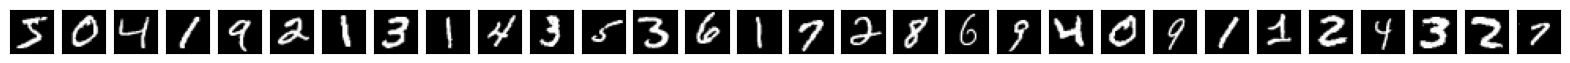

In [29]:
# Visualizando algumas imagens originais
n = 30
plt.figure(figsize=(20, 4))
for i in range(n):
    # Imagem de entrada com ruído
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**-> CONSTRUÇÃO DO MODELO AUTOENCODER COM DADOS ORIGINAIS**

In [10]:
# Definindo a dimensão da representação codificada
n_latent = 60

# Criando o modelo do autoencoder
model = Sequential()
model.add(Dense(units = 400, input_dim=x_train.shape[1], activation="relu"))
model.add(Dense(units = 200, activation="relu"))
model.add(Dense(units = n_latent, activation="relu"))
model.add(Dense(units = 200, activation="relu"))
model.add(Dense(units = 400, activation="relu"))
model.add(Dense(units = x_train.shape[1], activation="sigmoid"))

# Compilando o modelo
model.compile(optimizer='adam', loss='binary_crossentropy')

**-> TREINAMENTO COM DADOS ORIGINAIS E VALIDAÇÃO DO MODELO TREINADO COM DADOS SEM RUÍDOS**

In [ ]:
# Treinando o autoencoder
model.fit(x_train, x_train, epochs=30, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Codificando e decodificando as imagens de teste sem ruído
encoded_imgs = model.predict(x_test)

**-> GRÁFICO COMPARATIVO DE DADOS ORIGINAL E DADOS GERADOS EM FORMA DE IMAGEM - SEM RUÍDO GERADO**

In [ ]:
# Visualizando algumas imagens originais sem ruído e reconstruídas
n = 15
plt.figure(figsize=(20, 4))
for i in range(n):
    # Imagem original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Imagem reconstruída
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

-> VALIDAÇÃO COM DADOS COM RUÍDO USANDO O MESMO MODELO TREINADO ORIGINAL

In [ ]:
# Codificando e decodificando as imagens de teste com ruído
encoded_imgs = model.predict(x_test_noisy)

**-> GRÁFICO COMPARATIVO DE DADOS ORIGINAL E DADOS GERADOS EM FORMA DE IMAGEM - COM RUÍDO GERADO**

In [ ]:
# Visualizando algumas imagens originais com ruído e reconstruídas
n = 15
plt.figure(figsize=(20, 4))
for i in range(n):
    # Imagem de entrada com ruído
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Imagem reconstruída com redução do ruído
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

**-> CRIANDO UM MODELO DE CLASSIFICAÇÃO PARA TESTAR AS AMOSTRAS RUIDOSAS, AMOSTRAS ORIGINAIS E AS AMOSTRAS RECUPERADAS DO RUÍDO**

In [15]:
#dropout = 0.45
num_labels = len(np.unique(y_train))

model2 = Sequential()
model2.add(Dense(units=400, input_dim=x_train.shape[1], activation='relu'))
#model2.add(Dropout(dropout)) #Essa camada ajuda a evitar overfitting durante o treinamento, desligando aleatoriamente um certo número de neurônios durante cada passagem de treinamento
model2.add(Dense(units=100, activation='relu'))
#model2.add(Dropout(dropout))
model2.add(Dense(units=num_labels, activation='softmax'))

model2.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model2.fit(x_train, y_train, epochs=40, batch_size=256)

In [ ]:
loss, acc = model2.evaluate(x_test, y_test)
print("\nTeste de Acurácia Classificação sem Ruído: %.1f%%" % (100.0 * acc))
loss, acc = model2.evaluate(x_test_noisy, y_test)
print("\nTeste de Acurácia Classificação com Ruído: %.1f%%" % (100.0 * acc))
loss, acc = model2.evaluate(encoded_imgs, y_test)
print("\nTeste de Acurácia Classificação das Imagens Recuperadas do Ruído: %.1f%%" % (100.0 * acc))

**-> APRESENTANDO AS MÉTRICAS COM O SKLEARN**

In [ ]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, classification_report, mean_squared_error, ConfusionMatrixDisplay

y_pred = model2.predict(x_test)

#Converter as previsões para classes
y_pred = np.argmax(y_pred, axis=1)

print("Avaliação da Classificação")
print("Acurácia:", accuracy_score(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print(f"Matriz de confusão das amostras não apresentadas no treinamento:\n {confusion_matrix(y_test, y_pred)}")
print("")
relatorio = classification_report(y_test, y_pred, target_names=["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])
print("Relatório de classificação das amostras não apresentadas no treinamento:")
print(relatorio)

print(f"Matriz de confusão das amostras não apresentadas no treinamento:\n {confusion_matrix(y_test, y_pred)}")
print("")
conf_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])
cm_display.plot()
plt.show()